# Import Library


In [1407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder , OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingRegressor ,StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import zscore
import joblib
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [1408]:
df = pd.read_csv("../data/data.csv")

In [1409]:
data = df.copy()

# Data Exploration (EDA)

## Basic Info

In [1410]:
data.head()

,job_title,experience,education,location,work_year,experience_level,10th_score,12th_score,college_cgpa,company_size,company_location,salary
0,ML Engineer,3.9,Bachelor's,San Francisco,2016.0,Executive,70.51,70.43,6.24,Large,UK,85499.67
1,DevOps Engineer,11.5,Master's,Berlin,2016.0,Mid-level,70.30,98.64,8.86,NaN,UK,66659.24
2,Product Manager,3.9,High School,San Francisco,2021.0,Executive,82.36,76.58,6.22,Small,India,71528.18
3,DevOps Engineer,4.8,High School,London,2017.0,Senior-level,74.19,71.79,7.19,Large,UK,49841.80
4,DevOps Engineer,8.7,PhD,New York,2022.0,Entry-level,90.21,76.54,9.10,Small,Germany,74218.88


In [1411]:
data.shape

(93597, 12)

In [1412]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93597 entries, 0 to 93596
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_title         88917 non-null  object 
 1   experience        88917 non-null  float64
 2   education         88917 non-null  object 
 3   location          88917 non-null  object 
 4   work_year         88917 non-null  float64
 5   experience_level  88917 non-null  object 
 6   10th_score        88917 non-null  float64
 7   12th_score        88917 non-null  float64
 8   college_cgpa      88917 non-null  float64
 9   company_size      88917 non-null  object 
 10  company_location  88917 non-null  object 
 11  salary            88917 non-null  float64
dtypes: float64(6), object(6)
memory usage: 8.6+ MB


In [1413]:
data.isnull().sum()

job_title           4680
experience          4680
education           4680
location            4680
work_year           4680
experience_level    4680
10th_score          4680
12th_score          4680
college_cgpa        4680
company_size        4680
company_location    4680
salary              4680
dtype: int64

In [1414]:
data.duplicated().sum()

0

In [1415]:
data.columns

Index(['job_title', 'experience', 'education', 'location', 'work_year',
       'experience_level', '10th_score', '12th_score', 'college_cgpa',
       'company_size', 'company_location', 'salary'],
      dtype='object')

In [1416]:
data.describe()

,experience,work_year,10th_score,12th_score,college_cgpa,salary
count,88917.000000,88917.000000,88917.000000,88917.000000,88917.000000,88917.000000
mean,10.012518,2019.496306,80.022189,80.057003,7.498413,73462.213964
std,5.770971,2.867487,11.517301,11.556925,1.443255,22204.571236
min,0.000000,2015.000000,60.000000,60.000000,5.000000,13189.060000
25%,5.000000,2017.000000,70.080000,70.070000,6.250000,57175.530000
50%,10.000000,2019.000000,80.030000,80.050000,7.500000,72565.540000
75%,15.000000,2022.000000,89.970000,90.060000,8.740000,88222.680000
max,20.000000,2024.000000,100.000000,100.000000,10.000000,149850.440000


In [1417]:
data.nunique()

job_title               5
experience            201
education               4
location                5
work_year              10
experience_level        4
10th_score           4001
12th_score           4001
college_cgpa          501
company_size            3
company_location        4
salary              88436
dtype: int64

#### Outlier Detection

In [1418]:

num_cols = ['experience', '10th_score', '12th_score', 'college_cgpa', 'salary']

z_scores = data[num_cols].apply(zscore)

outliers = (z_scores.abs() > 3)

outlier_counts = outliers.sum()
print("Outlier counts per column:\n", outlier_counts)

df_no_outliers = data[~outliers.any(axis=1)]


Outlier counts per column:
 experience      0
10th_score      0
12th_score      0
college_cgpa    0
salary          0
dtype: int64


In [1419]:
data.groupby('education')['salary'].mean()

education
Bachelor's     65913.945331
High School    65991.517368
Master's       75814.967928
PhD            85979.353883
Name: salary, dtype: float64

In [1420]:

data.groupby('experience_level')['salary'].agg(['mean', 'count', 'min', 'max'])


,mean,count,min,max
experience_level,,,,
Entry-level,65958.527928,21234,18166.16,120722.09
Executive,95902.135062,21333,43614.84,149850.44
Mid-level,65967.627678,21022,13287.85,123679.89
Senior-level,65851.993402,20878,13189.06,122481.55


In [1421]:

numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()

display(correlation_matrix)

,experience,work_year,10th_score,12th_score,college_cgpa,salary
experience,1.000000,0.001172,0.002217,-0.001203,0.007784,0.648712
work_year,0.001172,1.000000,0.009219,-0.006496,-0.001401,0.003138
10th_score,0.002217,0.009219,1.000000,0.001389,-0.006143,-0.000232
12th_score,-0.001203,-0.006496,0.001389,1.000000,0.001606,0.000520
college_cgpa,0.007784,-0.001401,-0.006143,0.001606,1.000000,0.006569
salary,0.648712,0.003138,-0.000232,0.000520,0.006569,1.000000


In [1422]:
Q1 = data['salary'].quantile(0.25)
Q3 = data['salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['salary'] < Q1 - 1.5 * IQR) | (df['salary'] > Q3 + 1.5 * IQR)]
print("Outliers count:", outliers.shape[0])


Outliers count: 267


In [1423]:
data['salary'].skew()

0.26627374133730136

In [1424]:

data['salary'].kurt()


-0.3130672968999284

In [1425]:
data.describe(include='object')


,job_title,education,location,experience_level,company_size,company_location
count,88917,88917,88917,88917,88917,88917
unique,5,4,5,4,3,4
top,DevOps Engineer,PhD,Berlin,Executive,Small,India
freq,17910,22367,17949,22480,29837,22463


In [1426]:
num_unique_job_titles = data['job_title'].nunique()
print(f"Number of unique job titles: {num_unique_job_titles}")

unique_job_titles = data['job_title'].unique()
print("Unique job titles:")
for title in unique_job_titles:
    print("-", title)


Number of unique job titles: 5
Unique job titles:
- ML Engineer
- DevOps Engineer
- Product Manager
- Data Scientist
- nan
- Software Engineer


In [1427]:
num_experience_level = data['experience_level'].nunique()
print(f"Number of unique exp tile: {num_experience_level}")

unique_experience_level = data['experience_level'].unique()
print("Unique exp tile:")
for title in unique_experience_level:
    print("-", title)

Number of unique exp tile: 4
Unique exp tile:
- Executive
- Mid-level
- Senior-level
- Entry-level
- nan


In [1428]:
num_education_level = data['education'].nunique()
print(f"Number of unique education tile: {num_education_level}")

unique_education_level = data['education'].unique()
print("Unique education tile:")
for title in unique_education_level:
    print("-", title)

Number of unique education tile: 4
Unique education tile:
- Bachelor's
- Master's
- High School
- PhD
- nan


In [1429]:
num_location_level = data['location'].nunique()
print(f"Number of location: {num_location_level}")

unique_location_level = data['location'].unique()
print("Unique location:")
for title in unique_location_level:
    print("-", title)

Number of location: 5
Unique location:
- San Francisco
- Berlin
- London
- New York
- Bangalore
- nan


In [1430]:
num_company_size_level = data['company_size'].nunique()
print(f"Number of company size: {num_company_size_level}")

unique_company_size_level = data['company_size'].unique()
print("Unique company size:")
for title in unique_company_size_level:
    print("-", title)

Number of company size: 3
Unique company size:
- Large
- nan
- Small
- Medium


In [1431]:
num_company_location_level = data['company_location'].nunique()
print(f"Number of company location: {num_company_location_level}")

unique_company_location_level = data['company_location'].unique()
print("Unique company location:")
for title in unique_company_location_level:
    print("-", title)

Number of company location: 4
Unique company location:
- UK
- India
- Germany
- USA
- nan


#### apply only after log

In [1432]:
# Q1 = data['log_salary'].quantile(0.25)
# Q3 = data['log_salary'].quantile(0.75)
# IQR = Q3 - Q1

# outliers = data[(data['log_salary'] < Q1 - 1.5 * IQR) | (data['log_salary'] > Q3 + 1.5 * IQR)]
# print("Outliers count:", outliers.shape[0])

In [1433]:
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# data['log_salary'] = data['log_salary'].clip(lower=lower_bound, upper=upper_bound)

## Data Visualization

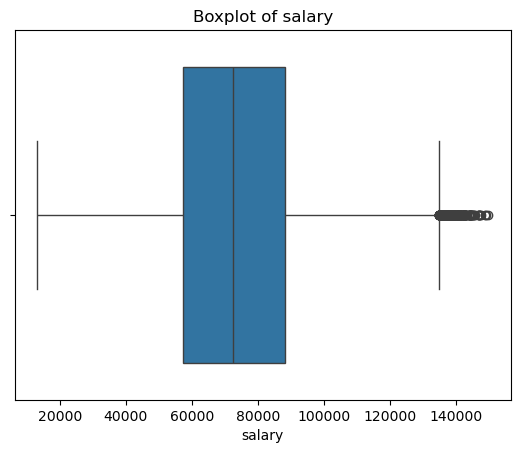

In [1434]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['salary'])
plt.title("Boxplot of salary")
plt.show()

### Univariate Analysis

#### Histogram

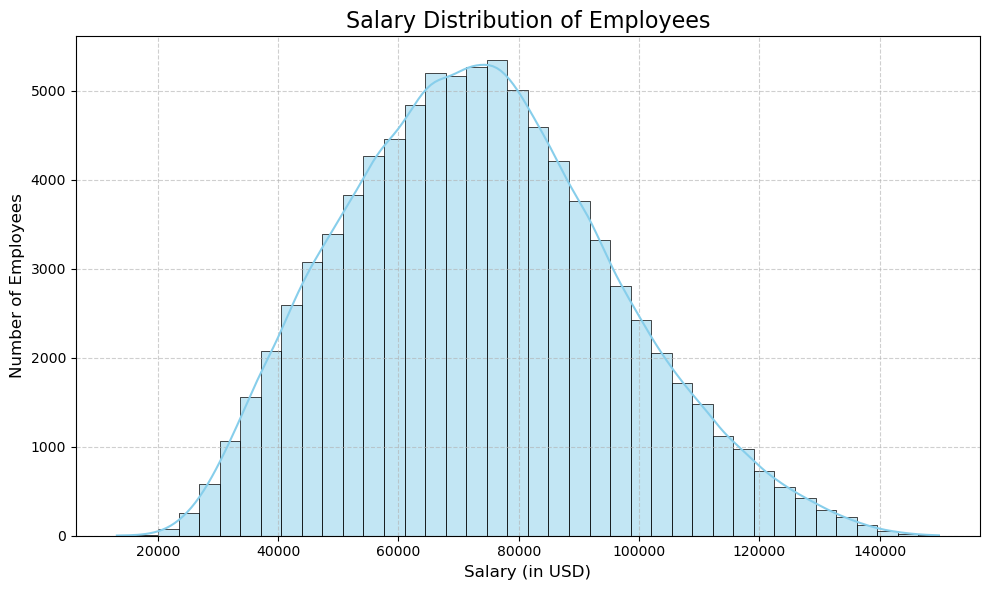

In [1435]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data['salary'].dropna(),
    kde=True,
    bins=40,
    color='skyblue',
    edgecolor='black',
    linewidth=0.5
)

plt.title('Salary Distribution of Employees', fontsize=16)
plt.xlabel('Salary (in USD)', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

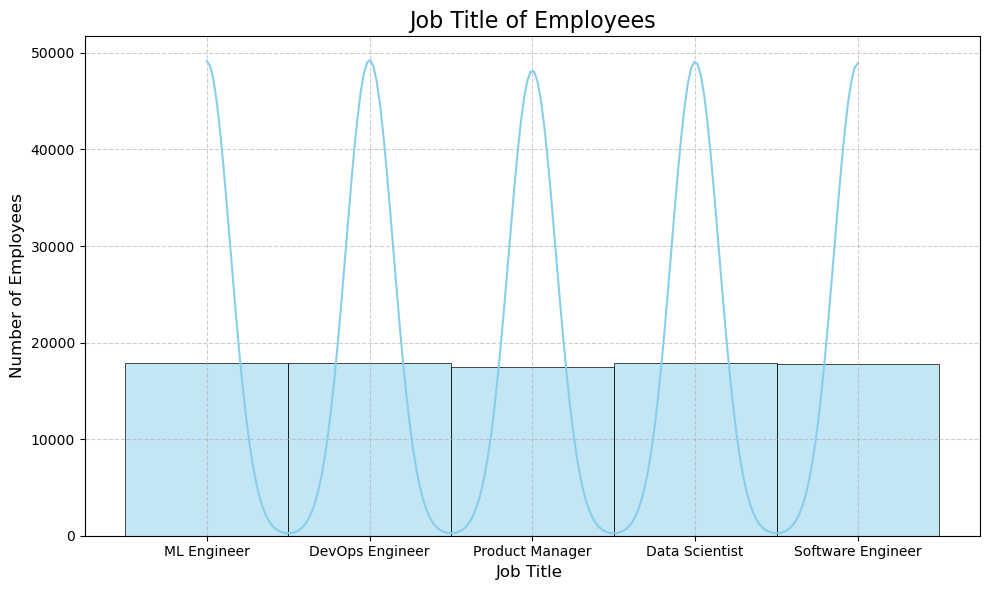

In [1436]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data['job_title'].dropna(),
    kde=True,
    bins=40,
    color='skyblue',
    edgecolor='black',
    linewidth=0.5
)

plt.title('Job Title of Employees', fontsize=16)
plt.ylabel('Number of Employees', fontsize=12)
plt.xlabel('Job Title ', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [1437]:
data.columns

Index(['job_title', 'experience', 'education', 'location', 'work_year',
       'experience_level', '10th_score', '12th_score', 'college_cgpa',
       'company_size', 'company_location', 'salary'],
      dtype='object')

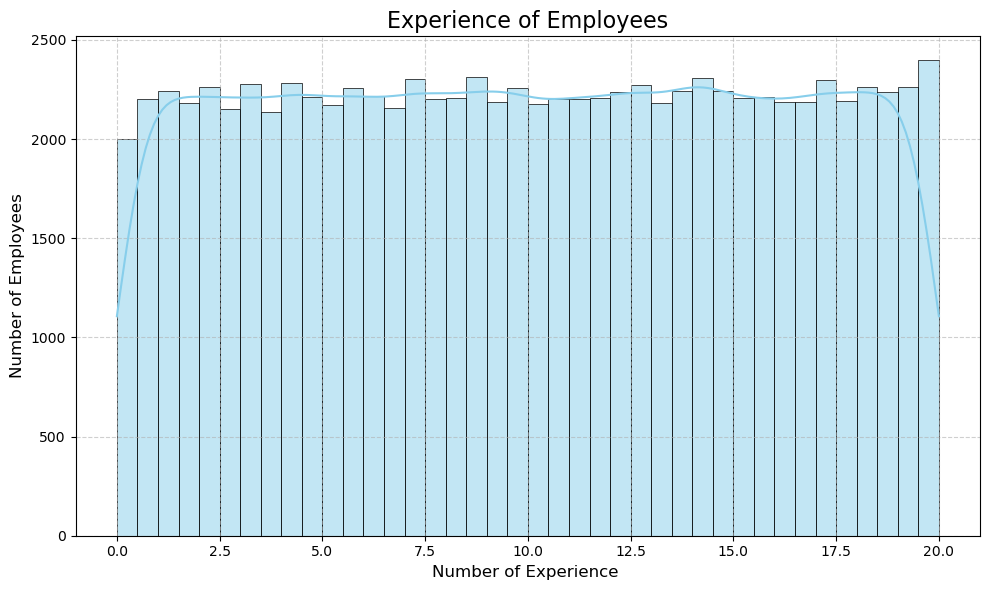

In [1438]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data['experience'].dropna(),
    kde=True,
    bins=40,
    color='skyblue',
    edgecolor='black',
    linewidth=0.5
)

plt.title('Experience of Employees', fontsize=16)
plt.ylabel('Number of Employees', fontsize=12)
plt.xlabel('Number of Experience ', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

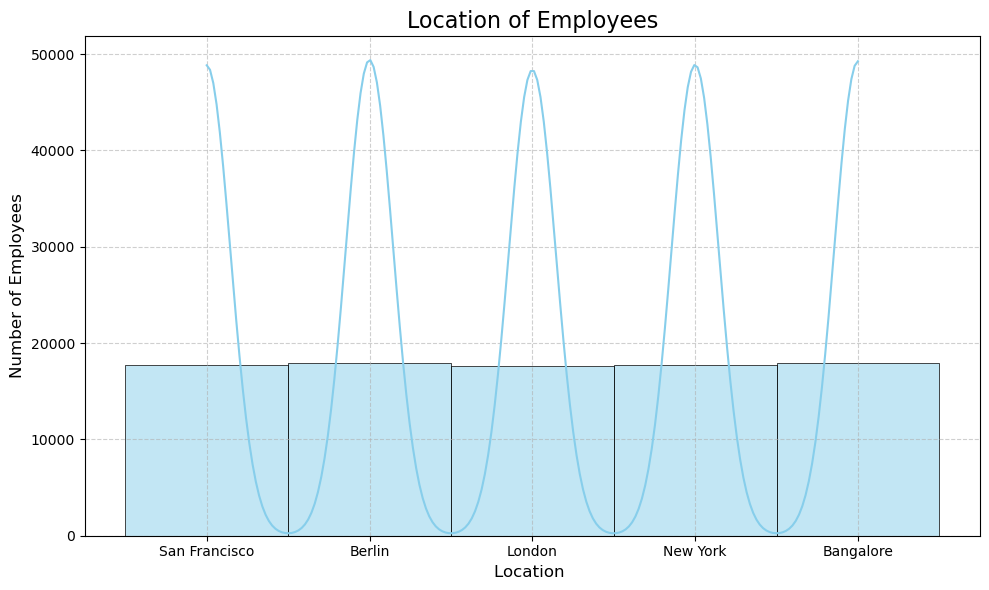

In [1439]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data['location'].dropna(),
    kde=True,
    bins=40,
    color='skyblue',
    edgecolor='black',
    linewidth=0.5
)

plt.title('Location of Employees', fontsize=16)
plt.ylabel('Number of Employees', fontsize=12)
plt.xlabel('Location ', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

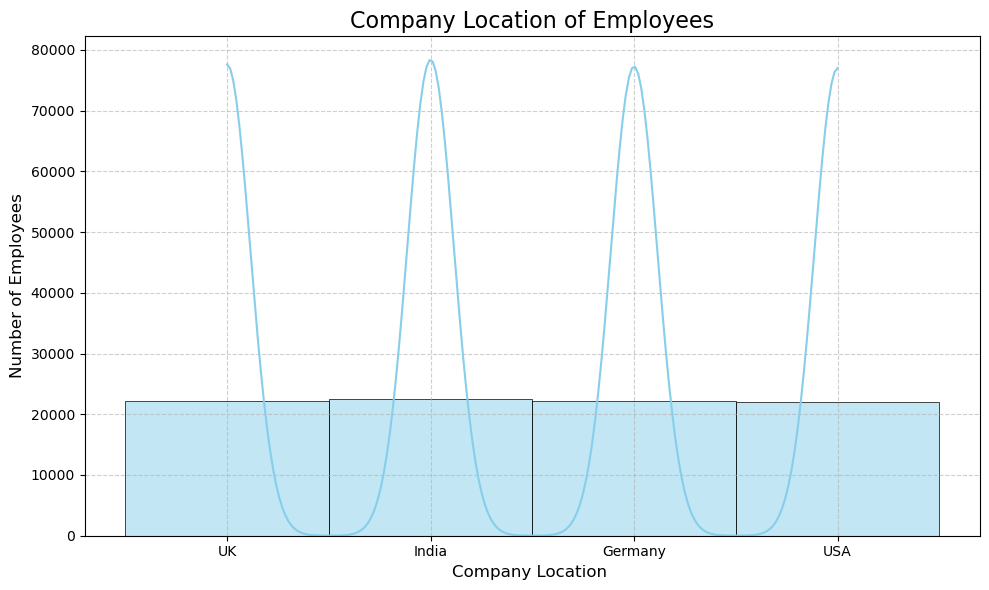

In [1440]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data['company_location'].dropna(),
    kde=True,
    bins=40,
    color='skyblue',
    edgecolor='black',
    linewidth=0.5
)

plt.title('Company Location of Employees', fontsize=16)
plt.ylabel('Number of Employees', fontsize=12)
plt.xlabel('Company Location ', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

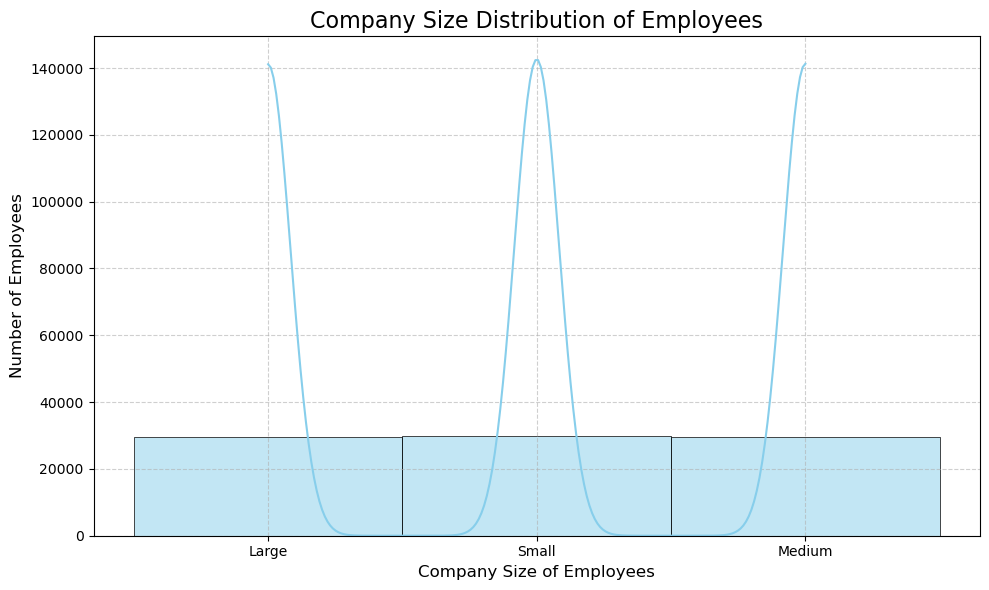

In [1441]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data['company_size'].dropna(),
    kde=True,
    bins=40,
    color='skyblue',
    edgecolor='black',
    linewidth=0.5
)

plt.title('Company Size Distribution of Employees', fontsize=16)
plt.ylabel('Number of Employees', fontsize=12)
plt.xlabel('Company Size of Employees', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Bivariate Analysis

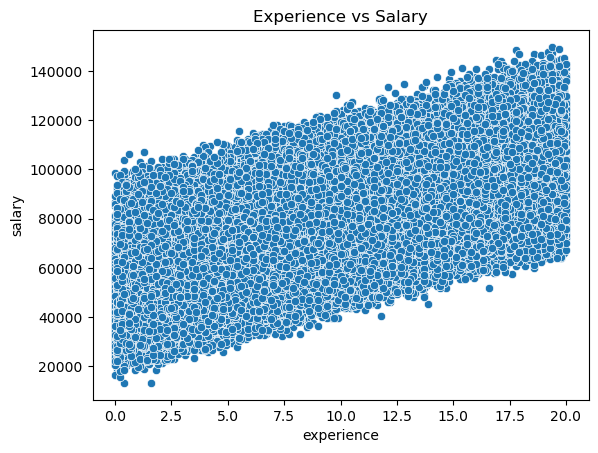

In [1442]:
sns.scatterplot(x='experience', y='salary', data=data)
plt.title("Experience vs Salary")
plt.show()

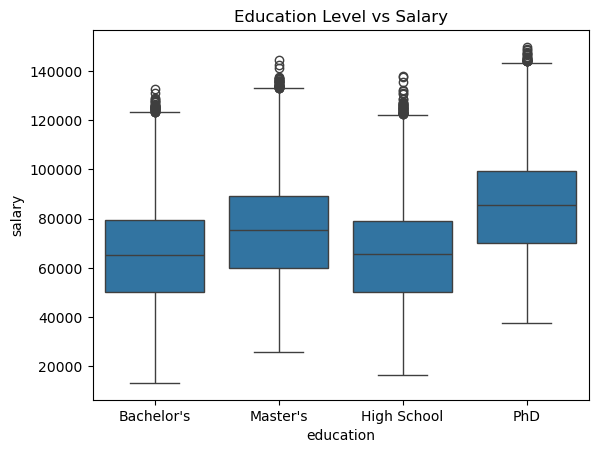

In [1443]:
sns.boxplot(x='education', y='salary', data=data)
plt.title("Education Level vs Salary")
plt.show()


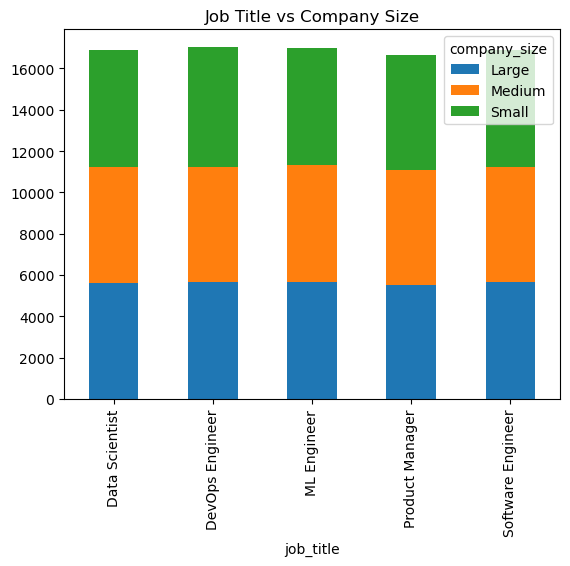

In [1444]:
pd.crosstab(data['job_title'], data['company_size']).plot(kind='bar', stacked=True)
plt.title("Job Title vs Company Size")
plt.show()


### Multivariate Analysis

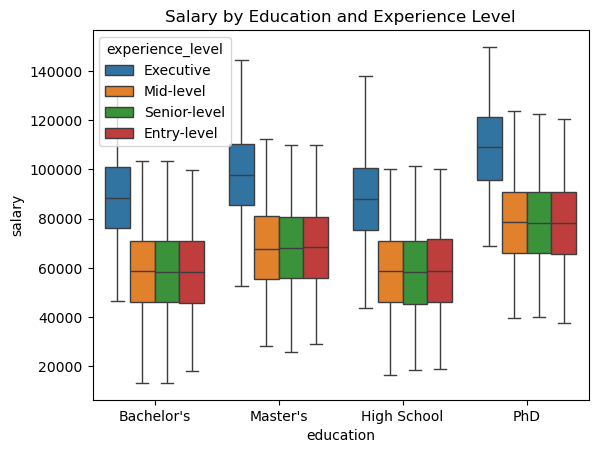

In [1445]:
sns.boxplot(x='education', y='salary', hue='experience_level', data=data)
plt.title("Salary by Education and Experience Level")
plt.show()

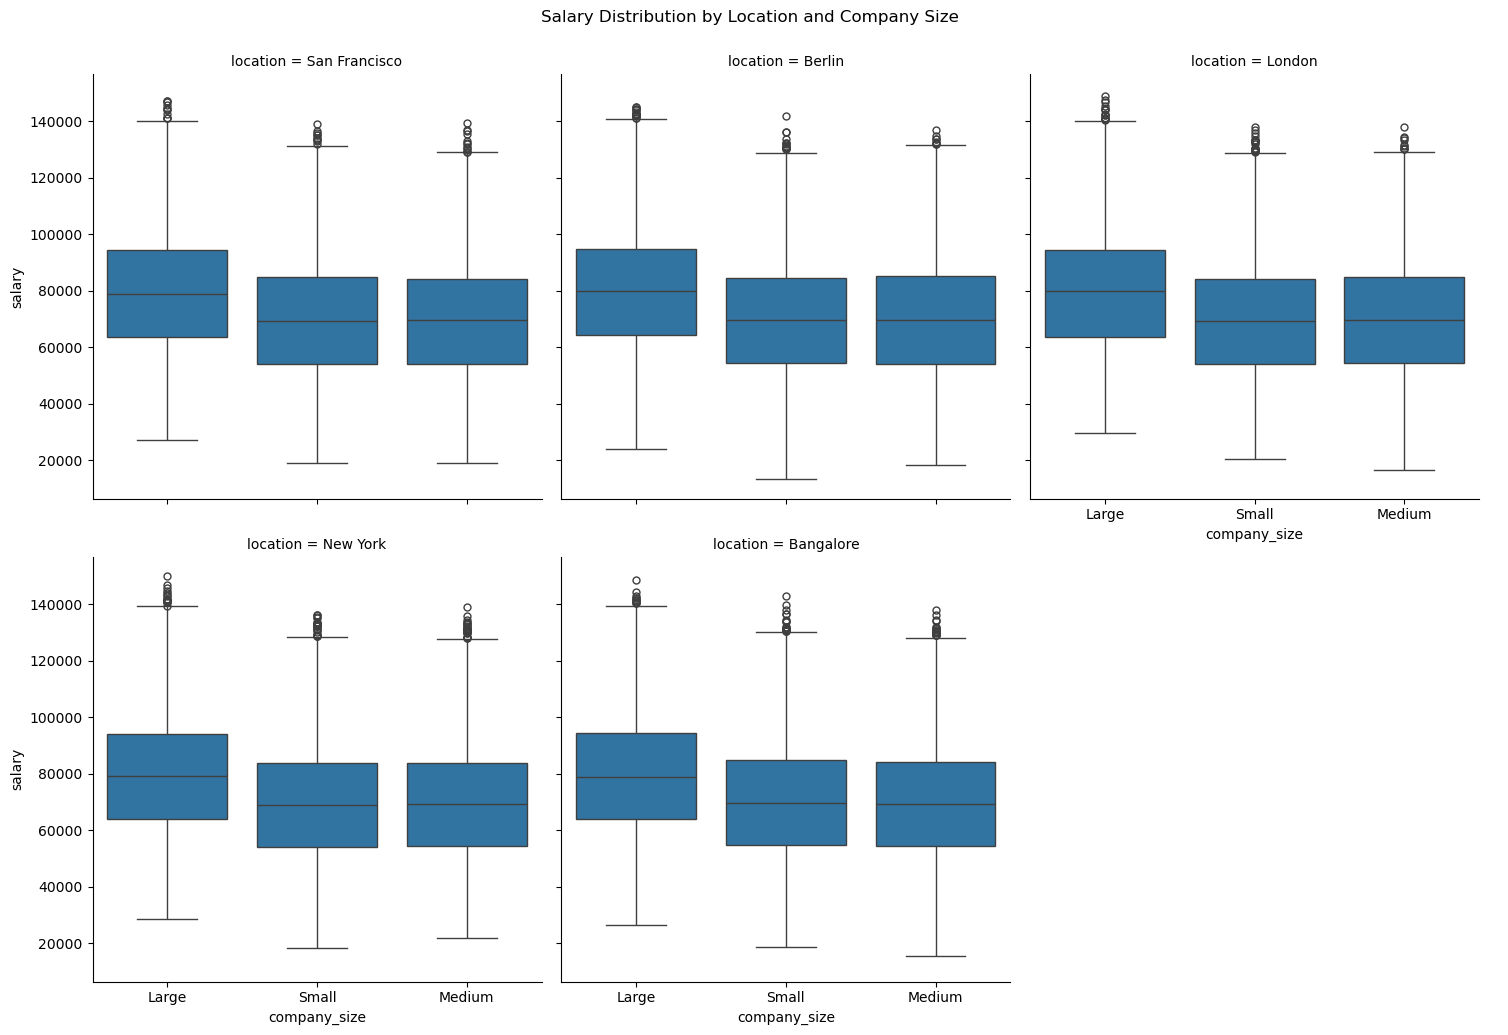

In [1446]:
sns.catplot(x="company_size", y="salary", col="location", kind="box", data=data, col_wrap=3)
plt.suptitle("Salary Distribution by Location and Company Size", y=1.03)
plt.show()

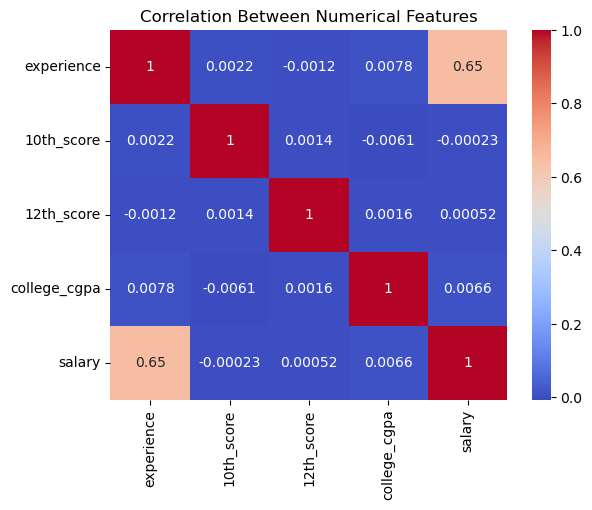

In [1447]:
numerical_cols = ['experience', '10th_score', '12th_score', 'college_cgpa', 'salary']
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()

# Data preprocessing

## Handle Missing Values

In [1448]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)

## Feature Engineering

In [1449]:
data["avg_school_score"] = (data["10th_score"] + data["12th_score"]) / 2
data.drop(["10th_score", "12th_score"], axis=1, inplace=True)

In [1450]:
def bucket_exp(x):
    if x <= 2:
        return '0-2'
    elif x <= 5:
        return '3-5'
    elif x <= 10:
        return '6-10'
    else:
        return '11-20'

data['experience_bucket'] = data['experience'].apply(bucket_exp)

In [1451]:
# data['work_year&cgpa'] = data['college_cgpa'] * data['work_year']
# data.drop(['college_cgpa', 'work_year','experience'], axis=1, inplace=True)

In [1452]:
def extract_seniority(title):
    title = title.lower()
    if 'lead' in title: return 'Lead'
    elif 'manager' in title: return 'Manager'
    elif 'junior' in title: return 'Junior'
    elif 'senior' in title: return 'Senior'
    elif 'principal' in title: return 'Principal'
    elif 'intern' in title: return 'Intern'
    else: return 'Mid'

In [1453]:
data['job_seniority_level'] = data['job_title'].apply(extract_seniority)
data.drop('job_title', axis=1, inplace=True)

In [1454]:
data["education"] = data["education"].replace({
    "PhD": "Postgraduate",
    "Master's": "Postgraduate",
    "Bachelor's": "Graduate",
    "High School": "School"
})

In [1455]:
data['log_salary'] = np.log1p(data['salary'])
data.drop('salary', axis=1, inplace=True)

In [1456]:
data.columns

Index(['experience', 'education', 'location', 'work_year', 'experience_level',
       'college_cgpa', 'company_size', 'company_location', 'avg_school_score',
       'experience_bucket', 'job_seniority_level', 'log_salary'],
      dtype='object')

## Encode Categorical Features

In [1457]:
data.columns

Index(['experience', 'education', 'location', 'work_year', 'experience_level',
       'college_cgpa', 'company_size', 'company_location', 'avg_school_score',
       'experience_bucket', 'job_seniority_level', 'log_salary'],
      dtype='object')

In [1458]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93597 entries, 0 to 93596
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   experience           93597 non-null  float64
 1   education            93597 non-null  object 
 2   location             93597 non-null  object 
 3   work_year            93597 non-null  float64
 4   experience_level     93597 non-null  object 
 5   college_cgpa         93597 non-null  float64
 6   company_size         93597 non-null  object 
 7   company_location     93597 non-null  object 
 8   avg_school_score     93597 non-null  float64
 9   experience_bucket    93597 non-null  object 
 10  job_seniority_level  93597 non-null  object 
 11  log_salary           93597 non-null  float64
dtypes: float64(5), object(7)
memory usage: 8.6+ MB


In [1459]:
categories = [
    ["Intern", "Junior", "Mid", "Senior", "Lead", "Manager", "Principal"],
    ["0-2", "3-5", "6-10", "11-20"],
    ["Entry-level", "Mid-level", "Senior", "Executive"],                 
    ["High School", "Bachelor's", "Masters", "PhD"],                       
    ["USA", "India", "Germany", "Canada"],                              
    ["Small", "Medium", "Large"],                                       
    ["USA", "India", "Germany", "Canada"],                             
]

oe = OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1)

categorical_cols = [
    'job_seniority_level',
    'experience_bucket',
    'experience_level',
    'education',
    'location',
    'company_size',
    'company_location'
]

oe.fit(data[categorical_cols])
data[categorical_cols] = oe.transform(data[categorical_cols])


## Feature Selection

In [1460]:
X = data.drop('log_salary', axis=1)
y = data['log_salary']

### Univariate Selection

In [1461]:
correlation = data.corr()['log_salary'].sort_values(key=abs, ascending=False)

top_corr = correlation.drop('log_salary').head(10)
print("Top 10 features correlated with salary:\n", top_corr)

Top 10 features correlated with salary:
 experience             0.627500
experience_bucket      0.578729
experience_level       0.421745
company_size           0.168525
college_cgpa           0.006333
job_seniority_level   -0.003810
work_year              0.002811
company_location      -0.002337
avg_school_score      -0.000289
education                   NaN
Name: log_salary, dtype: float64


In [1462]:
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

In [1463]:
data_univariate = data[selected_features]

In [1464]:
data_univariate

,experience,location,work_year,experience_level,college_cgpa,company_size,company_location,avg_school_score,experience_bucket,job_seniority_level
0,3.9,-1.0,2016.0,3.0,6.240000,2.0,-1.0,70.470,1.0,2.0
1,11.5,-1.0,2016.0,1.0,8.860000,0.0,-1.0,84.470,3.0,2.0
2,3.9,-1.0,2021.0,3.0,6.220000,0.0,1.0,79.470,1.0,5.0
3,4.8,-1.0,2017.0,-1.0,7.190000,2.0,-1.0,72.990,1.0,2.0
4,8.7,-1.0,2022.0,0.0,9.100000,0.0,2.0,83.375,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
93592,5.6,-1.0,2021.0,-1.0,5.120000,1.0,-1.0,84.435,2.0,2.0
93593,16.8,-1.0,2022.0,-1.0,8.570000,2.0,-1.0,68.410,3.0,2.0
93594,0.6,-1.0,2021.0,-1.0,9.890000,0.0,2.0,84.385,0.0,2.0
93595,17.3,-1.0,2019.0,1.0,7.498413,2.0,2.0,73.105,3.0,5.0


### Feature Importance from Models

In [1465]:
model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_

feature_importance = pd.Series(importances, index=X.columns)
selected = feature_importance.sort_values(ascending=False).head(10)


In [1466]:
data_feature_importance = data[selected.index]

In [1467]:
data_feature_importance

,experience,experience_level,avg_school_score,college_cgpa,company_size,work_year,company_location,job_seniority_level,experience_bucket,education
0,3.9,3.0,70.470,6.240000,2.0,2016.0,-1.0,2.0,1.0,-1.0
1,11.5,1.0,84.470,8.860000,0.0,2016.0,-1.0,2.0,3.0,-1.0
2,3.9,3.0,79.470,6.220000,0.0,2021.0,1.0,5.0,1.0,-1.0
3,4.8,-1.0,72.990,7.190000,2.0,2017.0,-1.0,2.0,1.0,-1.0
4,8.7,0.0,83.375,9.100000,0.0,2022.0,2.0,2.0,2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
93592,5.6,-1.0,84.435,5.120000,1.0,2021.0,-1.0,2.0,2.0,-1.0
93593,16.8,-1.0,68.410,8.570000,2.0,2022.0,-1.0,2.0,3.0,-1.0
93594,0.6,-1.0,84.385,9.890000,0.0,2021.0,2.0,2.0,0.0,-1.0
93595,17.3,1.0,73.105,7.498413,2.0,2019.0,2.0,5.0,3.0,-1.0


### Correlation Matrix

In [1468]:
corr_matrix = data.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.9)]
data_reduced = data.drop(columns=to_drop)

In [1469]:
data_reduced

,experience,education,location,work_year,experience_level,college_cgpa,company_size,company_location,avg_school_score,experience_bucket,job_seniority_level,log_salary
0,3.9,-1.0,-1.0,2016.0,3.0,6.240000,2.0,-1.0,70.470,1.0,2.0,11.356279
1,11.5,-1.0,-1.0,2016.0,1.0,8.860000,0.0,-1.0,84.470,3.0,2.0,11.107364
2,3.9,-1.0,-1.0,2021.0,3.0,6.220000,0.0,1.0,79.470,1.0,5.0,11.177861
3,4.8,-1.0,-1.0,2017.0,-1.0,7.190000,2.0,-1.0,72.990,1.0,2.0,10.816629
4,8.7,-1.0,-1.0,2022.0,0.0,9.100000,0.0,2.0,83.375,2.0,2.0,11.214787
...,...,...,...,...,...,...,...,...,...,...,...,...
93592,5.6,-1.0,-1.0,2021.0,-1.0,5.120000,1.0,-1.0,84.435,2.0,2.0,10.871062
93593,16.8,-1.0,-1.0,2022.0,-1.0,8.570000,2.0,-1.0,68.410,3.0,2.0,11.443407
93594,0.6,-1.0,-1.0,2021.0,-1.0,9.890000,0.0,2.0,84.385,0.0,2.0,10.280169
93595,17.3,-1.0,-1.0,2019.0,1.0,7.498413,2.0,2.0,73.105,3.0,5.0,11.293944


# Split the Data

In [1470]:
x = data_reduced.drop(['log_salary'], axis=1)
# x=data_feature_importance
y = data['log_salary']


In [1471]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Training

In [1472]:
rfr=RandomForestRegressor()
xgb=XGBRegressor()
lr=LinearRegression()
dt=DecisionTreeRegressor()
hgb=HistGradientBoostingRegressor()
etr=ExtraTreesRegressor()
gbr=GradientBoostingRegressor()
rg=Ridge()

In [1473]:
rfr.fit(x_train, y_train)
xgb.fit(x_train, y_train)
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
hgb.fit(x_train, y_train)
etr.fit(x_train, y_train)
gbr.fit(x_train, y_train)
rg.fit(x_train, y_train)


Ridge()

# Predict & Evaluate

In [1474]:
def ScoreAndError(model,x_test, y_test):
    preds = model.predict(x_test)


    rmse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    score = model.score(x_test, y_test)

    print(f"Model:        {model.__class__.__name__}")
    print(f"RMSE:         {rmse:.2f}")
    print(f"MAE:          {mae:.2f}")
    print(f"R² Score:     {r2:.4f}")
    print()



In [1475]:
models = [rfr, xgb, lr, dt, hgb, etr, gbr, rg]
for model in models:
    ScoreAndError(model, x_test, y_test)


Model:        RandomForestRegressor
RMSE:         0.04
MAE:          0.14
R² Score:     0.6433

Model:        XGBRegressor
RMSE:         0.03
MAE:          0.14
R² Score:     0.6559

Model:        LinearRegression
RMSE:         0.04
MAE:          0.16
R² Score:     0.5959

Model:        DecisionTreeRegressor
RMSE:         0.07
MAE:          0.20
R² Score:     0.3090

Model:        HistGradientBoostingRegressor
RMSE:         0.03
MAE:          0.14
R² Score:     0.6665

Model:        ExtraTreesRegressor
RMSE:         0.04
MAE:          0.15
R² Score:     0.6169

Model:        GradientBoostingRegressor
RMSE:         0.03
MAE:          0.14
R² Score:     0.6668

Model:        Ridge
RMSE:         0.04
MAE:          0.16
R² Score:     0.5959



# Hyperparameter Tuning

In [1476]:
models_params = {
    'RandomForest': (
        RandomForestRegressor(random_state=42),
        {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    ),
    'DecisionTree': (
        DecisionTreeRegressor(random_state=42),
        {
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    ),
    'XGBoost': (
        XGBRegressor(random_state=42, verbosity=0),
        {
            'n_estimators': [50, 100],
            'max_depth': [3, 6, 10],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.6, 0.8, 1.0]
        }
    ),
    'GradientBoosting': (
        GradientBoostingRegressor(random_state=42),
        {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5, 7]
        }
    ),
    'Ridge': (
        Ridge(),
        {
            'alpha': [0.01, 0.1, 1.0, 10.0]
        }
    ),
    'HistGradientBoosting': (
        HistGradientBoostingRegressor(random_state=42),
        {
            'learning_rate': [0.01, 0.05, 0.1],
            'max_iter': [100, 200],
            'max_depth': [None, 10, 20]
        }
    ),
    'ExtraTrees': (
        ExtraTreesRegressor(random_state=42),
        {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    ),
    'LinearRegression': (
        LinearRegression(),
        {
            'fit_intercept': [True, False]
        }
    )
}

## RandomizedSearchCV

In [1477]:
results = {}

for name, (model, params) in models_params.items():
    print(f"Running RandomizedSearchCV for {name}...")
    search = RandomizedSearchCV(
        model,
        param_distributions=params,
        n_iter=15,
        scoring='r2',
        cv=3,
        n_jobs=-1,
        random_state=42
    )
    search.fit(x_train, y_train)
    best_score = search.best_score_
    best_params = search.best_params_
    results[name] = {
        'best_score': best_score,
        'best_params': best_params
    }
    print(f"{name} → R²: {best_score:.4f} | Params: {best_params}")

Running RandomizedSearchCV for RandomForest...
RandomForest → R²: 0.6699 | Params: {'n_estimators': 150, 'min_samples_split': 10, 'max_depth': 10}
Running RandomizedSearchCV for DecisionTree...
DecisionTree → R²: 0.6668 | Params: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5}
Running RandomizedSearchCV for XGBoost...
XGBoost → R²: 0.6728 | Params: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
Running RandomizedSearchCV for GradientBoosting...
GradientBoosting → R²: 0.6730 | Params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Running RandomizedSearchCV for Ridge...
Ridge → R²: 0.6043 | Params: {'alpha': 10.0}
Running RandomizedSearchCV for HistGradientBoosting...
HistGradientBoosting → R²: 0.6721 | Params: {'max_iter': 200, 'max_depth': 20, 'learning_rate': 0.05}
Running RandomizedSearchCV for ExtraTrees...
ExtraTrees → R²: 0.6714 | Params: {'n_estimators': 150, 'min_samples_split': 10, 'max_depth': 10}
Running RandomizedS

## GridSearchCSV

In [1478]:
from sklearn.model_selection import GridSearchCV

results = {}

for name, (model, params) in models_params.items():
    print(f"Running GridSearchCV for {name}...")
    search = GridSearchCV(
        model,
        param_grid=params,
        scoring='r2',
        cv=3,
        n_jobs=-1
    )
    search.fit(x_train, y_train)
    best_score = search.best_score_
    best_params = search.best_params_
    results[name] = {
        'best_score': best_score,
        'best_params': best_params
    }
    print(f"{name} → R²: {best_score:.4f} | Params: {best_params}")

Running GridSearchCV for RandomForest...
RandomForest → R²: 0.6699 | Params: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}
Running GridSearchCV for DecisionTree...
DecisionTree → R²: 0.6668 | Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Running GridSearchCV for XGBoost...
XGBoost → R²: 0.6729 | Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Running GridSearchCV for GradientBoosting...
GradientBoosting → R²: 0.6730 | Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Running GridSearchCV for Ridge...
Ridge → R²: 0.6043 | Params: {'alpha': 10.0}
Running GridSearchCV for HistGradientBoosting...
HistGradientBoosting → R²: 0.6722 | Params: {'learning_rate': 0.05, 'max_depth': None, 'max_iter': 100}
Running GridSearchCV for ExtraTrees...
ExtraTrees → R²: 0.6714 | Params: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}
Running GridSearchCV for LinearRegression...
LinearRegressi

# Advanced Ensemble Techniques

## Best Parameters

In [1479]:
rf = RandomForestRegressor(
    n_estimators=150,
    min_samples_split=2,
    max_depth=10,
    random_state=42
)

dt = DecisionTreeRegressor(
    min_samples_split=10,
    min_samples_leaf=4,
    max_depth=10,
    random_state=42
)

xgb = XGBRegressor(
    subsample=1.0,
    n_estimators=50,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

gbr = GradientBoostingRegressor(
    n_estimators=50,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

hgb = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=None,
    max_iter=200,
    random_state=42
)

etr = ExtraTreesRegressor(
    n_estimators=150,
    min_samples_split=10,
    max_depth=10,
    random_state=42
)

lr = LinearRegression(
    fit_intercept=True
)

ridge = Ridge(alpha=10.0)

## Voting

In [1480]:
voting = VotingRegressor(estimators=[
     ('rf', rf),      
    ('xgb', xgb),     
    ('gbr', gbr),     
    ('lr', lr),      
    ('ridge', ridge)
])
voting.fit(x_train, y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=150,
                                                   random_state=42)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=6,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=50,
                                          n_jobs=None, num_parallel_tree=None, ...)),
                            ('gbr',
                             GradientBoostingRegressor(max_depth=5,
                                                       n_estimators=50,
                                                       random_state=42)),
                            ('lr', LinearRegression()),
                            ('ridge', Ridge(alpha=10.0))])

In [1481]:
ScoreAndError(voting, x_test, y_test)

Model:        VotingRegressor
RMSE:         0.03
MAE:          0.14
R² Score:     0.6545



## Stacking

In [1482]:
stacking  = StackingRegressor(estimators=[
     ('rf', rf),      
    ('xgb', xgb),     
    ('gbr', gbr),     
    ('lr', lr),      
    ('ridge', ridge)
])
stacking.fit(x_train,y_train)

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=10,
                                                     n_estimators=150,
                                                     random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weigh...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                              ('gbr',
                               GradientBoostingRegressor(max_depth=5,
                                                         n_estimators=50,
                                                         random_state=42)),
                              ('lr', LinearRegression()),
                              ('ridge', Ridge(alpha=10.0))])

In [1483]:
ScoreAndError(stacking, x_test, y_test)

Model:        StackingRegressor
RMSE:         0.03
MAE:          0.14
R² Score:     0.6665



## Meta Model Tweaking

In [1484]:
# Base models
estimators = [
     ('rf', rf),      
    ('xgb', xgb),     
    ('gbr', gbr),     
    ('lr', lr),      
    ('ridge', ridge)
]

meta_model = GradientBoostingRegressor(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)


stacking = StackingRegressor(
    estimators=estimators,
    final_estimator=meta_model,
    cv=5,
    passthrough=True,
    n_jobs=-1
)

stacking.fit(x_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('rf',
                               RandomForestRegressor(max_depth=10,
                                                     n_estimators=150,
                                                     random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                              ('gbr',
                               GradientBoostingRegressor(max_depth=5,
                                                         n_estimators=50,
                                                         random_state=42)),
                              ('lr', LinearRegression()),
                              ('ridge', Ridge(alpha=10.0))],
                  final_estimator=GradientBoostingRegressor(n_estimators=50,
                                                            random_state=42),
                  n_jobs=-1, passthrough=True)

# Final Model Evaluation

In [1485]:
ScoreAndError(stacking, x_test, y_test)

Model:        StackingRegressor
RMSE:         0.03
MAE:          0.14
R² Score:     0.6661



In [1486]:
x_train.columns

Index(['experience', 'education', 'location', 'work_year', 'experience_level',
       'college_cgpa', 'company_size', 'company_location', 'avg_school_score',
       'experience_bucket', 'job_seniority_level'],
      dtype='object')

# Saving Final Model

In [1487]:
joblib.dump(stacking, "../model/model.pkl")
joblib.dump(oe, "../model/oe.pkl")
joblib.dump(selector, "../model/selector.pkl")
joblib.dump(importances, "../model/feature_importance.pkl")
joblib.dump(x_train.columns.tolist(), "../model/columns.pkl")

['../model/columns.pkl']